# Data Preprocessing

All datasets for book downloaded from: https://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=11704&itemId=0470908742&resourceId=46577

## 2.1 WHY DO WE NEED TO PREPROCESS THE DATA?

>For example, the databases may contain

* Fields that are obsolete or redundant,
* Missing values,
* Outliers,
* Data in a form not suitable for the data mining models,
* Values not consistent with policy or common sense.

> Example from: https://archive.ics.uci.edu/ml/index.php

In [ ]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.names

import numpy as np
import pandas as pd

input_file = "arrhythmia.data"

df = pd.read_csv(input_file,header=None)
df[np.arange(10,20)]

## 2.2 DATA CLEANING

<p>
<img src="./img/L02.02.00.png" width="50%">
<p/>


## 2.3 HANDLING MISSING DATA

>Some common criteria for choosing replacement values for missing data are as follows:
1. Replace the missing value with some constant, specified by the analyst.
2. Replace the missing value with the field mean (for numeric variables) or the mode (for categorical variables).
3. Replace the missing values with a value generated at random from the observed distribution of the variable.
4. Replace the missing values with imputed values based on the other characteristics of the record.

<img src="./img/L02.03.00.png" width=50%>

<img src="./img/L02.03.01.png" width=50%>

<img src="./img/L02.03.02.png" width=50%>

<img src="./img/L02.03.03.png" width=50%>

>Example from: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

In [ ]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

import pandas as pd
import numpy as np
import re

input_file = "auto-mpg.data-original"

data = []
with open(input_file, 'r') as f:
    for line in f:
        columns = re.split(r'\s+', line.strip())
        for i,c in enumerate(columns):
            if '"' in c:
                columns[i:] = [' '.join(columns[i:])]
        data.append(columns)

columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

df = pd.DataFrame(data,columns=columns)
df.head(20)

In [ ]:
df.replace('NA', np.nan, inplace=True)
rows_having_nan_values = df[df.isnull().any(axis=1)].index.values.tolist()
df.loc[rows_having_nan_values]

In [ ]:
df.loc[:,df.columns != 'car name'] = df.loc[:,df.columns != 'car name'].astype('float16')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['mpg'] = df['mpg'].fillna(df['mpg'].mean())
df.loc[rows_having_nan_values]

In [ ]:
df['car name'].mode()

## 2.4 IDENTIFYING MISCLASSIFICATIONS

<img src="./img/L02.04.00.png" width=50%>

## 2.5 GRAPHICAL METHODS FOR IDENTIFYING OUTLIERS

<img src="./img/L02.05.00.png" width=50%>

<img src="./img/L02.05.01.png" width=50%>

In [ ]:
df['car name'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
df['weight'].hist(bins=np.arange(0,6000,200),edgecolor='#7F00FF',alpha=0.5,fill=None,linewidth=2)
plt.show()

In [ ]:
df.plot(x='weight',y='mpg',kind='scatter',fc='white',ec='#7F00FF',s=50,alpha=0.75)
plt.show()

## 2.6 MEASURES OF CENTER AND SPREAD

<img src="./img/L02.06.00.png" width=30%>

<img src="./img/L02.06.01.png" width=50%>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data_sets/churn.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 2.7 DATA TRANSFORMATION

Neural networks benefit from normalization, as do algorithms that make use of distance measures, such as the k-nearest neighbor algorithm.

## 2.8 MIN-MAX NORMALIZATION

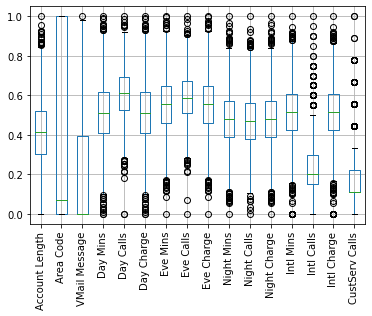

In [3]:
import matplotlib.pyplot as plt

dfnum = df.select_dtypes(include='number')
dfnum_normalized = (dfnum - dfnum.min()) / (dfnum.max() - dfnum.min())
dfnum_normalized.boxplot()
plt.xticks(rotation=90)
plt.show()


## 2.9 Z-SCORE STANDARDIZATION

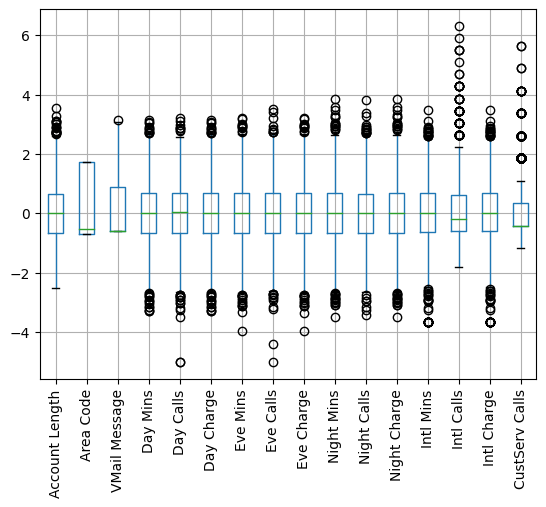

In [4]:
dfnum_standardized = (dfnum - dfnum.mean()) / dfnum.std()
dfnum_standardized.boxplot()
plt.xticks(rotation=90)
plt.show()


## 2.10 DECIMAL SCALING

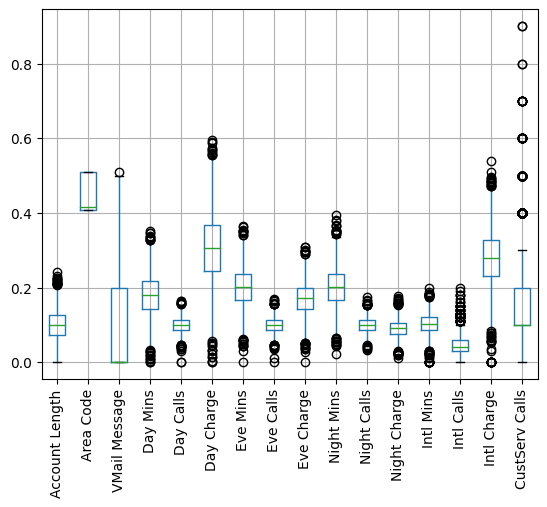

In [5]:
dfnum_max = dfnum.abs().max().values
d = np.log10(dfnum_max).astype('int')+1
dfnum_decimal = dfnum / 10**d

# print(d)
# dfnum

dfnum_decimal.boxplot()
plt.xticks(rotation=90)
plt.show()


## 2.11 TRANSFORMATIONS TO ACHIEVE NORMALITY

<table>
  <tr>
    <td><img src="img/L02.11.02.png"></td>
    <td><img src="img/L02.11.00.png"></td>
    <td><img src="img/L02.11.03.png"></td>
  </tr>
</table>

<img src="img/L02.11.01.png" width="20%">
<br>
<img src="img/L02.11.04.png" width="50%">


<img src="img/L02.11.05.png" width="50%">
<br>
<img src="img/L02.11.06.png" width="50%">
<br>
<img src="img/L02.11.07.png" width="50%">


skew befor transformation: 0.42
skew after transformation: 0.14


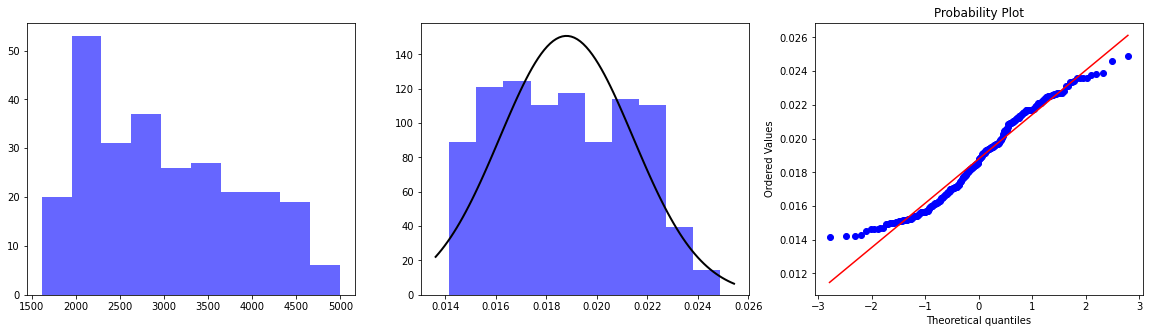

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./data_sets/cars.txt")

data_ = df[' weightlbs']
print(f"skew befor transformation: {np.round(data_.skew(),2)}")
# data = (data_ - data_.mean()) / data_.std()
data = 1/np.sqrt(data_)
# data = data_.apply(lambda x: 1/np.sqrt(x))
# data = 1/np.log(data_)
print(f"skew after transformation: {np.round(data.skew(),2)}")


fig,axs = plt.subplots(1,3,figsize=(20,5))

axs[0].hist(data_, bins=10, alpha=0.6, color='b',density=False)

axs[1].hist(data, bins=10, alpha=0.6, color='b',density=True)
xmin, xmax = axs[1].get_xlim()
mu, std = st.norm.fit(data)
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
axs[1].plot(x, p, 'k', linewidth=2)

st.probplot(data, dist="norm", plot=axs[2])

plt.show()


## 2.12 NUMERICAL METHODS FOR IDENTIFYING OUTLIERS

* The Z-score method for identifying outliers states that a data value is an outlier if it has a Z-score that is either less than −3 or greater than 3. 

* The first quartile (Q1) is the 25th percentile.
* The second quartile (Q2) is the 50th percentile, that is, the median.
* The third quartile (Q3) is the 75th percentile.

* The interquartile range (IQR):  IQR = Q3 – Q1
    * A robust measure of outlier detection is therefore defined as follows. A data value is an outlier if it is located 1.5(IQR) or more below Q1 or located 1.5(IQR) or more above Q3.

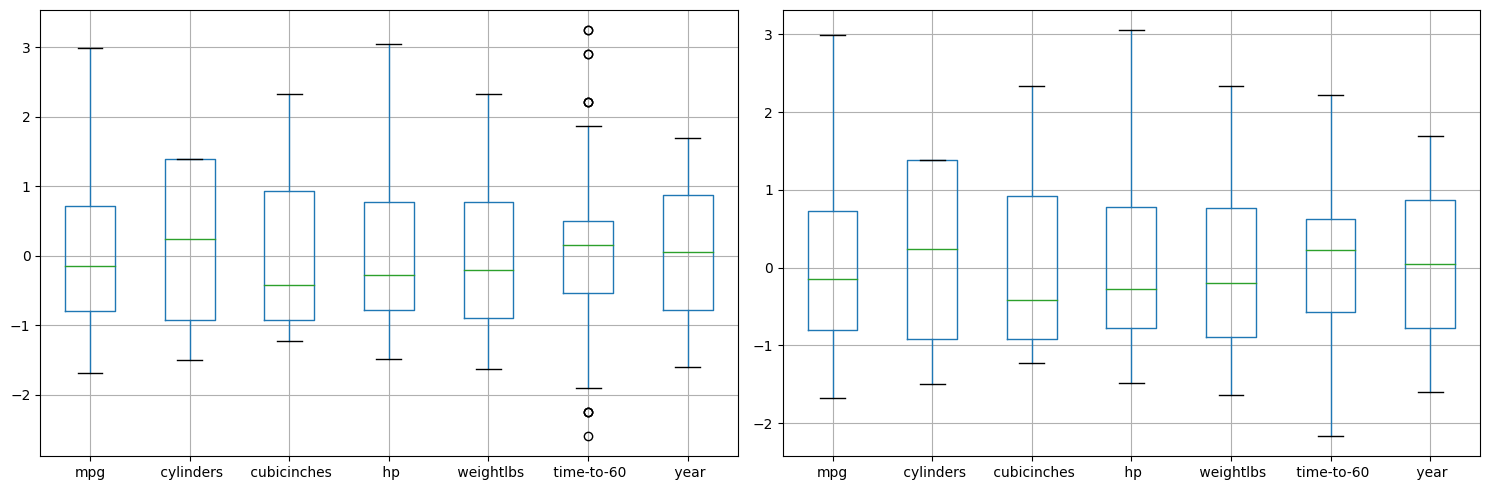

In [6]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./data_sets/cars.txt")
dfnum = df.select_dtypes(include='number')

# bp = plt.boxplot(dfnum_normalized)
# fliers = bp['fliers']
# fliers[14].get_data()

def get_outliers(df):
    q1,q2,q3 = df.quantile([0.25,0.5,0.75]).to_numpy()
    iqr = q3-q1
    qmax = q3 + 1.5*iqr 
    qmin = q1 - 1.5*iqr
    df_filtered = df[(df > qmin) & (df < qmax)]
    return df_filtered

dfnum_clean = get_outliers(dfnum)
dfnum_clean = (dfnum_clean - dfnum_clean.mean())/dfnum_clean.std()

fig,axs = plt.subplots(1,2,figsize=(15,5))

dfnum = (dfnum-dfnum.mean())/dfnum.std()
dfnum.boxplot(ax=axs[0])

dfnum_clean.boxplot(ax=axs[1])

plt.tight_layout()
plt.show()


## 2.13 FLAG VARIABLES

* A flag variable (or dummy variable or indicator variable) is a categorical variable taking only two values, 0 and 1.
    
    When a categorical predictor takes k ≥ 3 possible values, then define k − 1 dummy variables, and use the unassigned category as the reference category. For example, if a categorical predictor region has k = 4 possible categories, {north, east, south, west}, then the analyst could define the following k − 1 = 3 flag variables.
    * north flag : If region = north then north flag = 1; otherwise north flag = 0.
    * east flag : If region = east then east flag = 1; otherwise east flag = 0.
    * south flag : If region = south then south flag = 1; otherwise south flag = 0.
    * The flag variable for the west is not needed.


## 2.14 TRANSFORMING CATEGORICAL VARIABLES INTO NUMERICAL VARIABLES

* So, in most instances, the data analyst should avoid transforming categorical variables to numerical variables. The exception is for categorical variables that are clearly ordered, such as the variable survey_response, taking values always, usually, sometimes, never.

<img src="img/L02.14.00.png" width="20%">
<img src="img/L02.14.01.png" width="30%">


## 2.15 BINNING NUMERICAL VARIABLES

<img src="img/L02.15.00.png" width="50%">

<img src="img/L02.15.01.png" width="50%">

## 2.16 RECLASSIFYING CATEGORICAL VARIABLES

Reclassifying categorical variables is the categorical equivalent of binning numerical variables. \
Often, a categorical variable will contain too many field values to be easily analyzable. In such a case, the data analyst should reclassify the field values. For example, the 50 states could each be reclassified as the variable region, containing field values Northeast, Southeast, North Central, Southwest, and West. Thus, instead of 50 different field values, the analyst (and algorithm) is faced with only 5.

## 2.17 ADDING AN INDEX FIELD

* It is recommended that the data analyst create an index field, which tracks the sort order of the records in the database. 

## 2.18 REMOVING VARIABLES THAT ARE NOT USEFUL

* Unary variables
* Variables which are very nearly unary

Unary variables take on only a single value, so a unary variable is not so much a variable as a constant. \
Sometimes a variable can be very nearly unary. For example, suppose that 99.95% of the players in a field hockey league are female, with the remaining 0.05% male. 

## 2.19 VARIABLES THAT SHOULD PROBABLY NOT BE REMOVED

It is (unfortunately) a common—though questionable—practice to remove from analysis the following types of variables: 
* Variables for which 90% or more of the values are missing. 
* Variables which are strongly correlated.

Before you remove a variable because it has 90% or more missing values, consider that there may be a pattern in the missingness, and therefore useful information, that you may be jettisoning.\
\
Inclusion of correlated variables may at best double-count a particular aspect of the analysis, and at worst lead to instability of the model results. When confronted with two strongly correlated variables, therefore, some data analysts may decide to simply remove one of the variables. Instead, it is suggested that principal component analysis be applied, where the common variability in correlated predictors may be translated into a set of uncorrelated principal components

## 2.20 REMOVAL OF DUPLICATE RECORDS

Duplicate records lead to an overweighting of the data values in those records, so, if the records are truly duplicate, only one set of them should be retained.

## 2.21 A WORD ABOUT ID FIELDS

Because ID fields have a different value for each record, they will not be helpful for your downstream data mining algorithms. They may even be hurtful, with the algorithm finding some spurious relationship between ID field and your target. Thus it is recommended that ID fields should be filtered out from the data mining algorithms, but should not be removed from the data, so that the data analyst can differentiate between similar records.